In [128]:
# Importing Packages
import pandas as pd
from datetime import datetime, timedelta

In [129]:
df = pd.read_csv("delhi_data.csv")
print(df.shape)

(60250, 15)


In [130]:
# Taking stations with constant entries for ease of analysis
df["siteCode"] = [i[5:] for i in df["siteCode"]]
st_list = [str(i) for i in range(1420,1436)]
boolList = [True if i in st_list else False for i in df["siteCode"]]
df = df[pd.Series(boolList)]
df.reset_index(drop="index", inplace=True)

In [131]:
# Changing dtype of siteCode and PM2.5, drop columns
df["siteCode"] = [int(i) for i in df["siteCode"]]
df["PM2.5"] = [float(i) for i in df["PM2.5"]]
df.drop(columns=["toDate", "fromTime", "toTime", "cityName", "stateName"], inplace=True)


In [132]:
# Changing date to DateTime format
df["fromDate"] = [datetime.strptime(d, "%d-%b-%y") for d in df["fromDate"]]
df.rename(columns={"fromDate":"Date"}, inplace=True)

In [133]:
df.head()

,siteName,siteCode,Date,PM2.5,PM10,NO2,NH3,SO2,CO,Ozone
0,Ashok Vihar,1420,2018-02-08,236.96,405.79,109.97,31.45,11.20,1.42,33.42
1,Ashok Vihar,1420,2018-02-09,250.46,423.21,79.40,33.55,13.24,1.42,39.28
2,Ashok Vihar,1420,2018-02-10,269.71,498.88,183.86,22.66,7.16,3.03,44.46
3,Ashok Vihar,1420,2018-02-11,146.42,315.46,41.84,36.72,8.38,1.05,42.96
4,Ashok Vihar,1420,2018-02-12,82.08,199.92,23.24,34.80,4.43,0.72,37.89


---

In [134]:
# Inserting Id and removing CO

df.insert(loc=0, column = "Id", value= range(df.shape[0]))
df.drop(columns=["CO"], inplace=True)
print(df.shape)

(15900, 10)


In [135]:
# Removing these stations entries
for i in ["Dr. Karni Singh Shooting Range", "Jawaharlal Nehru Stadium",
          "Major Dhyan Chand National Stadium", "Okhla Phase-2", "Nehru Nagar"]:
    df = df[df["siteName"]!=i]

In [136]:
# Sorting the data by dates! There were jumbled block of dates in some stations.
df["iDate"] = [ (d - df["Date"][0]).days for d in df["Date"]]
df.sort_values(by= ["siteName","iDate"], inplace=True)
df.drop(columns=["iDate"], inplace=True, axis = 1)
df.reset_index(drop="index", inplace=True)
df["Id"] = list(range(df.shape[0]))

In [137]:
df.head()

,Id,siteName,siteCode,Date,PM2.5,PM10,NO2,NH3,SO2,Ozone
0,0,Ashok Vihar,1420,2018-02-08,236.96,405.79,109.97,31.45,11.20,33.42
1,1,Ashok Vihar,1420,2018-02-09,250.46,423.21,79.40,33.55,13.24,39.28
2,2,Ashok Vihar,1420,2018-02-10,269.71,498.88,183.86,22.66,7.16,44.46
3,3,Ashok Vihar,1420,2018-02-11,146.42,315.46,41.84,36.72,8.38,42.96
4,4,Ashok Vihar,1420,2018-02-12,82.08,199.92,23.24,34.80,4.43,37.89


---

In [138]:
"""
looping through days from sd to ed
    looping through stations as we have entry for each station for each day
         if entry is NA (keeping index as i)
             look for prev/next 5 days depending upon modulo index
                 replace avg of 5 days
"""            
sd = datetime(2018, 2, 8)
ed = datetime(2021, 1, 2)
def fill(par,t):
    l = []
    for d in range((ed-sd).days + 1):
        for i,j in zip(df["Id"][df["Date"] == sd+timedelta(d)], df[par][df["Date"] == sd+timedelta(d)].isna()):
            if j == True:
                avg = []
                for k in range(t):
                    if (i%1060) <=530:
                        avg.append(float(df[par][df["Id"]==i+k][i+k]))
                    else:
                        avg.append(float(df[par][df["Id"]==i-k][i-k]))
                if sum([i if i>=0 else 0 for i in avg])!=0:
                    df.loc[i,par] = sum([i if i>=0 else 0 for i in avg])/5

In [139]:
# Executing above code block in two iterations, first four-day average then seven-day average
for i in df.columns[4:]:
    fill(i,4)
    fill(i,7)

In [141]:
df.drop(columns=["Id"], inplace=True, axis = 1)
df.head()

,siteName,siteCode,Date,PM2.5,PM10,NO2,NH3,SO2,Ozone
0,Ashok Vihar,1420,2018-02-08,236.96,405.79,109.97,31.45,11.20,33.42
1,Ashok Vihar,1420,2018-02-09,250.46,423.21,79.40,33.55,13.24,39.28
2,Ashok Vihar,1420,2018-02-10,269.71,498.88,183.86,22.66,7.16,44.46
3,Ashok Vihar,1420,2018-02-11,146.42,315.46,41.84,36.72,8.38,42.96
4,Ashok Vihar,1420,2018-02-12,82.08,199.92,23.24,34.80,4.43,37.89


---

In [142]:
import matplotlib.pyplot as plt

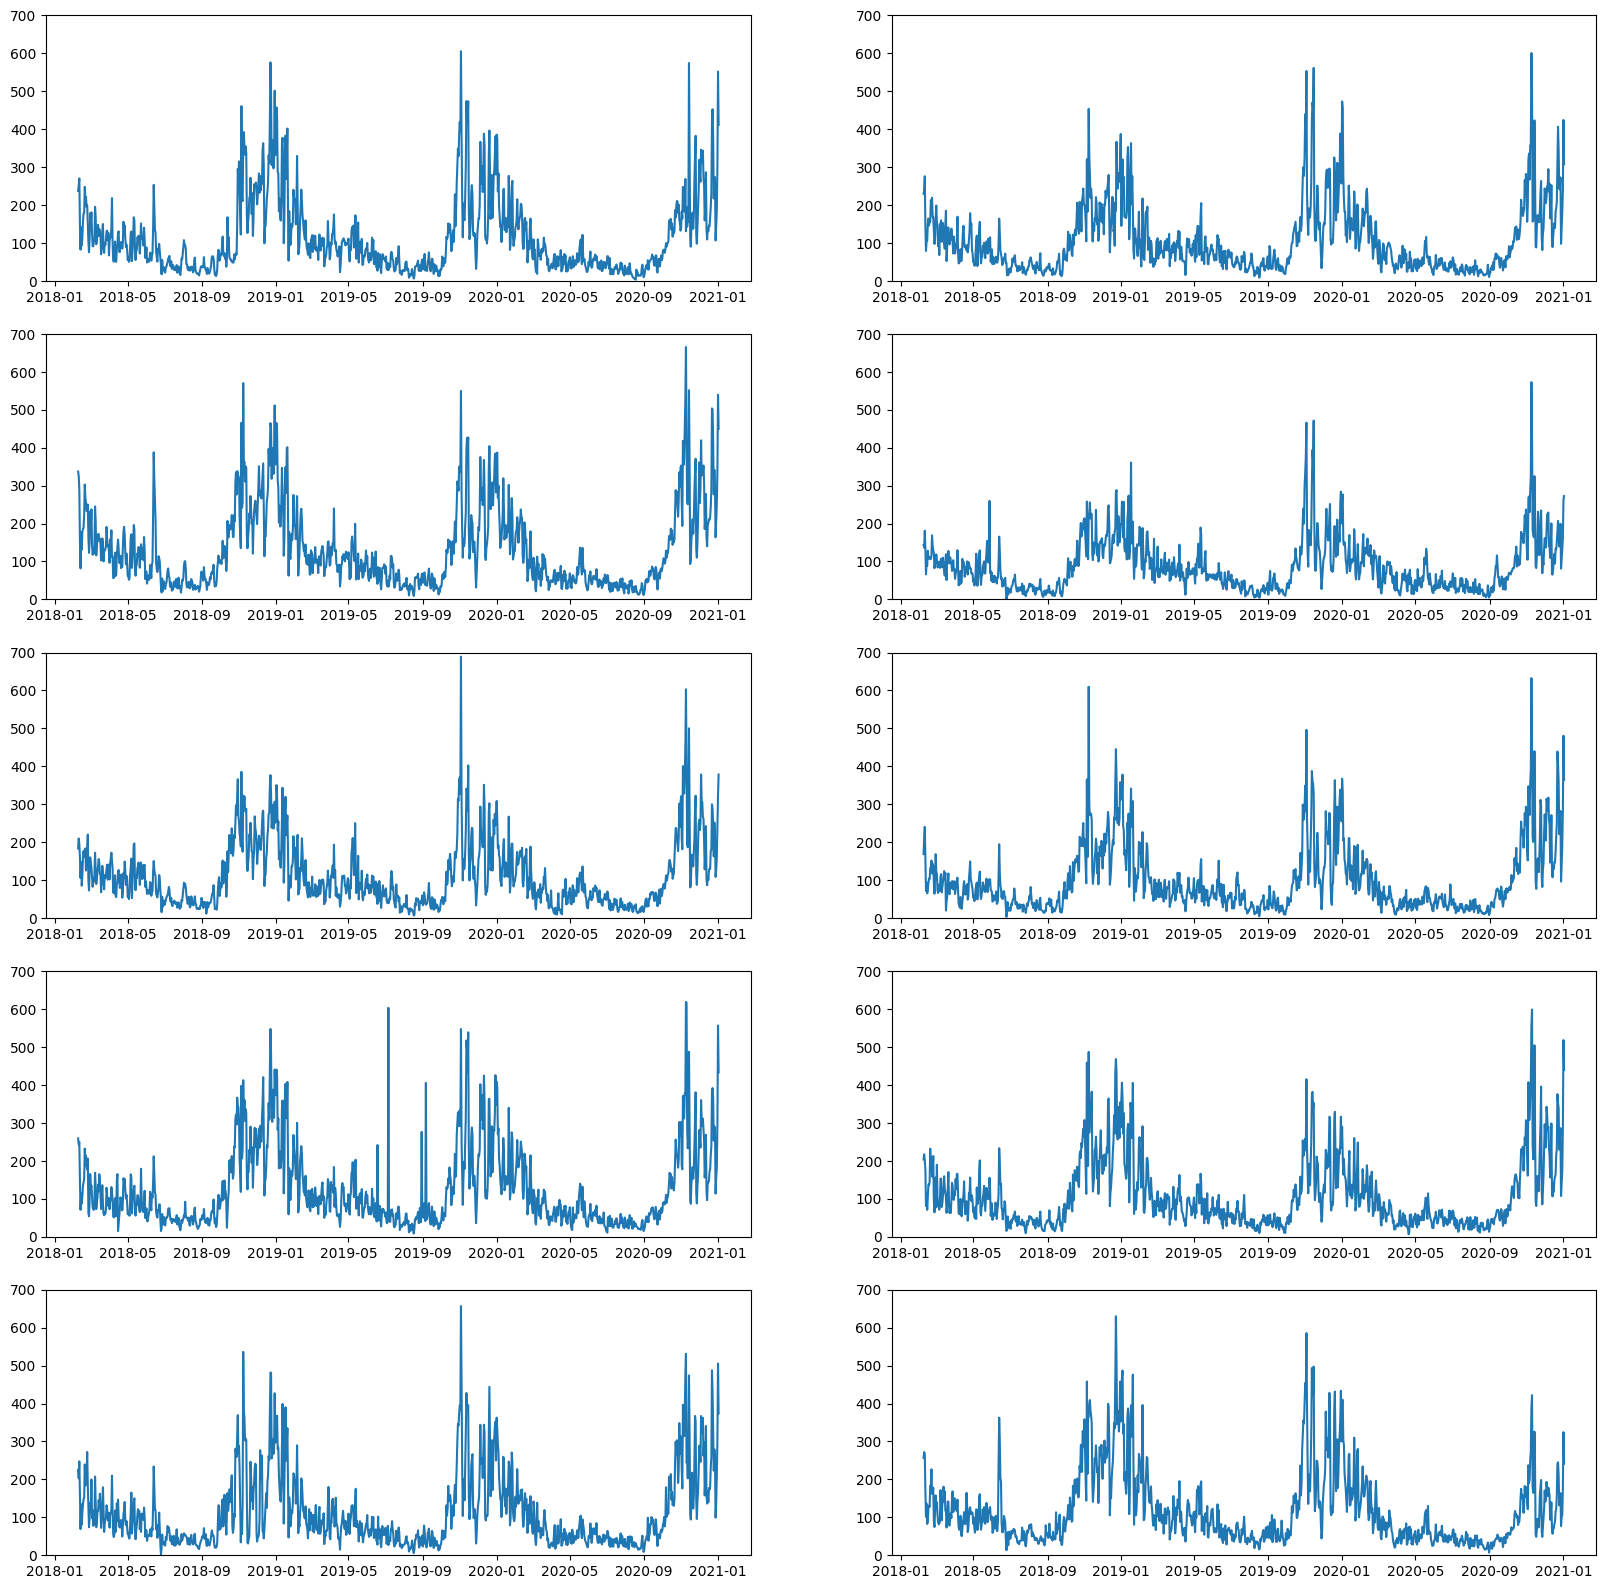

In [143]:
plt.figure(figsize=(20,20))
for i,j in zip(df["siteName"].unique(), range(10)):
    plt.subplot(5,2,j+1)
    plt.ylim(0,700)
    plt.plot(df[df["siteName"] == i]["Date"], df[df["siteName"] == i]["PM2.5"])

In [144]:
df.to_csv('pre_delhi_data.csv', index=False)